<a href="https://colab.research.google.com/github/vedantsawant/CSE512-ML-Project/blob/main/RockPaperScissors%20Architecture%203.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import zipfile  
from tensorflow.keras import regularizers

In [ ]:
!wget --no-check-certificate \
https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip

!wget --no-check-certificate \
https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip

--2022-11-28 21:22:48--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.12.128, 74.125.68.128, 142.250.4.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.12.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 200682221 (191M) [application/zip]
Saving to: ‘rps.zip’

rps.zip             100%[===================>] 191.38M  21.7MB/s    in 10s     

2022-11-28 21:22:59 (18.9 MB/s) - ‘rps.zip’ saved [200682221/200682221]

--2022-11-28 21:22:59--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.12.128, 74.125.68.128, 142.250.4.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.12.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29516758 (28M) [application/zip]
Saving to: ‘rps-test-set.zip’

In [ ]:
zip_ref_train = zipfile.ZipFile('/content/rps.zip')
zip_ref_train.extractall()
zip_ref_train.close()

zip_ref_test = zipfile.ZipFile('/content/rps-test-set.zip')
zip_ref_test.extractall()
zip_ref_test.close()

In [ ]:
train_dir = '/content/rps'
test_dir = '/content/rps-test-set'

train_paper_dir = os.path.join(train_dir, 'paper')
train_rock_dir = os.path.join(train_dir, 'rock') 
train_scissors_dir = os.path.join(train_dir, 'scissors')

test_paper_dir = os.path.join(test_dir, 'paper')
test_rock_dir = os.path.join(test_dir, 'rock') 
test_scissors_dir = os.path.join(test_dir, 'scissors')

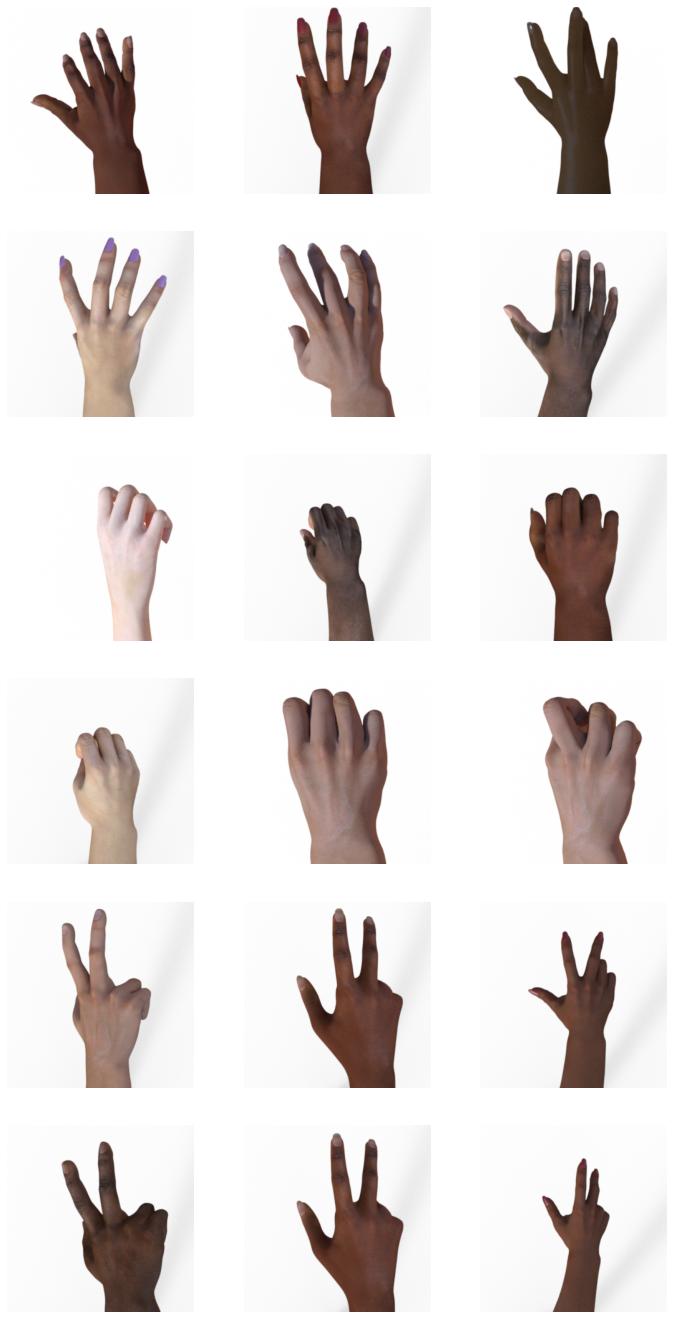

In [ ]:
ncols = 6
nrows = 3
index = 0

fig = plt.gcf()
fig.set_size_inches(nrows*4, ncols*4)

index += 6
next_paper_pix = [os.path.join(train_paper_dir, fname) for fname in os.listdir(train_paper_dir)[index-6 : index]]
next_rock_pix = [os.path.join(train_rock_dir, fname) for fname in os.listdir(train_rock_dir)[index-6 : index]]
next_scissors_pix = [os.path.join(train_scissors_dir, fname) for fname in os.listdir(train_scissors_dir)[index-6 : index]]

for i, img_path in enumerate(next_paper_pix+next_rock_pix+next_scissors_pix):
  sp = plt.subplot(ncols, nrows, i+1)
  sp.axis('off')
  img = mpimg.imread(img_path)
  plt.imshow(img)

In [ ]:
print(len(os.listdir(train_paper_dir))+len(os.listdir(train_rock_dir))+len(os.listdir(train_scissors_dir)))
print(len(os.listdir(test_paper_dir))+len(os.listdir(test_rock_dir))+len(os.listdir(test_scissors_dir)))

2520
372


### Base Model

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1/255,
                                   width_shift_range = 0,
                                   height_shift_range = 0,
                                   rotation_range = 0,
                                   horizontal_flip = False,
                                   shear_range = 0,
                                   zoom_range = 0,
                                   fill_mode = 'nearest')
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size = 128,
                                                    target_size = (300, 300),
                                                    class_mode = 'categorical')

test_datagen = ImageDataGenerator(rescale = 1/255.0)
test_generator = test_datagen.flow_from_directory(test_dir,
                                                  batch_size = 32,
                                                  target_size = (300, 300),
                                                  class_mode = 'categorical')

Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.


In [ ]:
model = tf.keras.Sequential([tf.keras.layers.Conv2D(16, (3, 3), activation = 'relu', input_shape = (300, 300, 3)),
                             tf.keras.layers.MaxPooling2D(2, 2),
                             tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
                             tf.keras.layers.MaxPooling2D(2, 2),
                             tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
                             tf.keras.layers.MaxPooling2D(2, 2),
                             tf.keras.layers.Conv2D(128, (3, 3), activation = 'relu'),
                             tf.keras.layers.MaxPooling2D(2, 2),
                             tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(512, activation = 'relu'),
                             tf.keras.layers.Dense(3, activation = 'softmax')])
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

In [ ]:
history = model.fit(train_generator,
                    steps_per_epoch = 8,
                    validation_data = test_generator,
                    validation_steps = 8,
                    epochs = 50,
                    verbose = 1)

Epoch 1/50
8/8 [==============================] - 18s 911ms/step - loss: 1.9978 - accuracy: 0.4106 - val_loss: 1.0865 - val_accuracy: 0.3594
Epoch 2/50
8/8 [==============================] - 6s 729ms/step - loss: 0.9875 - accuracy: 0.5654 - val_loss: 1.0579 - val_accuracy: 0.4570
Epoch 3/50
8/8 [==============================] - 6s 726ms/step - loss: 0.6858 - accuracy: 0.7041 - val_loss: 0.9620 - val_accuracy: 0.5938
Epoch 4/50
8/8 [==============================] - 6s 706ms/step - loss: 0.3629 - accuracy: 0.8699 - val_loss: 0.6907 - val_accuracy: 0.7539
Epoch 5/50
8/8 [==============================] - 6s 802ms/step - loss: 0.1423 - accuracy: 0.9590 - val_loss: 0.6178 - val_accuracy: 0.8047
Epoch 6/50
8/8 [==============================] - 6s 719ms/step - loss: 0.0479 - accuracy: 0.9873 - val_loss: 0.6312 - val_accuracy: 0.8516
Epoch 7/50
8/8 [==============================] - 6s 726ms/step - loss: 0.0225 - accuracy: 0.9941 - val_loss: 0.9174 - val_accuracy: 0.7891
Epoch 8/50
8/8 [===

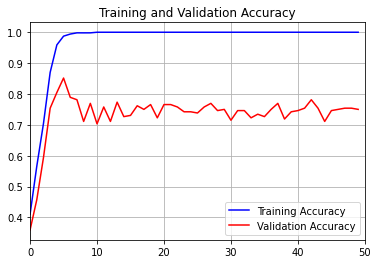

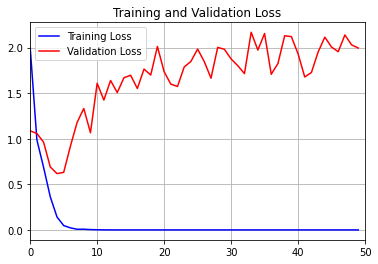

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, label = 'Training Accuracy', color = 'blue')
plt.plot(epochs, val_acc, label = 'Validation Accuracy', color = 'red')
plt.xlim([0,50])
plt.grid('on')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, label = 'Training Loss', color = 'blue')
plt.plot(epochs, val_loss, label = 'Validation Loss',color = 'red')
plt.xlim([0,50])
plt.grid('on')
plt.title('Training and Validation Loss')
plt.legend()

### L1 Regularization

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1/255,
                                   width_shift_range = 0,
                                   height_shift_range = 0,
                                   rotation_range = 0,
                                   horizontal_flip = False,
                                   shear_range = 0,
                                   zoom_range = 0,
                                   fill_mode = 'nearest')
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size = 128,
                                                    target_size = (300, 300),
                                                    class_mode = 'categorical')

test_datagen = ImageDataGenerator(rescale = 1/255.0)
test_generator = test_datagen.flow_from_directory(test_dir,
                                                  batch_size = 32,
                                                  target_size = (300, 300),
                                                  class_mode = 'categorical')

Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.


In [ ]:
model = tf.keras.Sequential([tf.keras.layers.Conv2D(16, (3, 3), activation = 'relu', input_shape = (300, 300, 3)),
                             tf.keras.layers.MaxPooling2D(2, 2),
                             tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu',kernel_regularizer=regularizers.l1(l=0.01)),
                             tf.keras.layers.MaxPooling2D(2, 2),
                             tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu',kernel_regularizer=regularizers.l1(l=0.01)),
                             tf.keras.layers.MaxPooling2D(2, 2),
                             tf.keras.layers.Conv2D(128, (3, 3), activation = 'relu'),
                             tf.keras.layers.MaxPooling2D(2, 2),
                             tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(512, activation = 'relu'),
                             tf.keras.layers.Dense(3, activation = 'softmax')])
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 149, 149, 16)     0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 147, 147, 32)      4640      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 73, 73, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 71, 71, 64)        18496     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 35, 35, 64)      

In [ ]:
history = model.fit(train_generator,
                    steps_per_epoch = 8,
                    validation_data = test_generator,
                    validation_steps = 8,
                    epochs = 50,
                    verbose = 1)

Epoch 1/50
8/8 [==============================] - 7s 860ms/step - loss: 11.0318 - accuracy: 0.3779 - val_loss: 10.0104 - val_accuracy: 0.3555
Epoch 2/50
8/8 [==============================] - 6s 708ms/step - loss: 9.1652 - accuracy: 0.6426 - val_loss: 8.6239 - val_accuracy: 0.5820
Epoch 3/50
8/8 [==============================] - 6s 730ms/step - loss: 7.6719 - accuracy: 0.7900 - val_loss: 7.3669 - val_accuracy: 0.6562
Epoch 4/50
8/8 [==============================] - 6s 700ms/step - loss: 6.4027 - accuracy: 0.9065 - val_loss: 6.3387 - val_accuracy: 0.6875
Epoch 5/50
8/8 [==============================] - 6s 730ms/step - loss: 5.3665 - accuracy: 0.9634 - val_loss: 5.3005 - val_accuracy: 0.7969
Epoch 6/50
8/8 [==============================] - 6s 757ms/step - loss: 4.4557 - accuracy: 0.9795 - val_loss: 4.4205 - val_accuracy: 0.8086
Epoch 7/50
8/8 [==============================] - 6s 732ms/step - loss: 3.6915 - accuracy: 0.9932 - val_loss: 3.8028 - val_accuracy: 0.8164
Epoch 8/50
8/8 [==

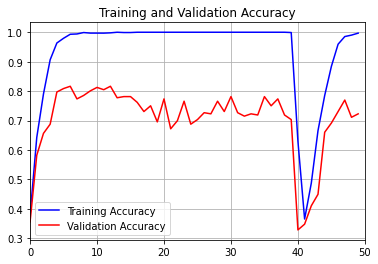

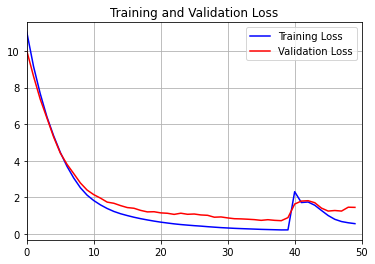

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, label = 'Training Accuracy', color = 'blue')
plt.plot(epochs, val_acc, label = 'Validation Accuracy', color = 'red')
plt.xlim([0,50])
plt.grid('on')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, label = 'Training Loss', color = 'blue')
plt.plot(epochs, val_loss, label = 'Validation Loss',color = 'red')
plt.xlim([0,50])
plt.grid('on')
plt.title('Training and Validation Loss')
plt.legend()

In [ ]:
train_generator.class_indices

{'paper': 0, 'rock': 1, 'scissors': 2}

### L2 Regularization

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1/255,
                                   width_shift_range = 0,
                                   height_shift_range = 0,
                                   rotation_range = 0,
                                   horizontal_flip = False,
                                   shear_range = 0,
                                   zoom_range = 0,
                                   fill_mode = 'nearest')
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size = 128,
                                                    target_size = (300, 300),
                                                    class_mode = 'categorical')

test_datagen = ImageDataGenerator(rescale = 1/255.0)
test_generator = test_datagen.flow_from_directory(test_dir,
                                                  batch_size = 32,
                                                  target_size = (300, 300),
                                                  class_mode = 'categorical')

Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.


In [ ]:
model = tf.keras.Sequential([tf.keras.layers.Conv2D(16, (3, 3), activation = 'relu', input_shape = (300, 300, 3)),
                             tf.keras.layers.MaxPooling2D(2, 2),
                             tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu',kernel_regularizer=regularizers.l2(l=0.01)),
                             tf.keras.layers.MaxPooling2D(2, 2),
                             tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu',kernel_regularizer=regularizers.l2(l=0.01)),
                             tf.keras.layers.MaxPooling2D(2, 2),
                             tf.keras.layers.Conv2D(128, (3, 3), activation = 'relu'),
                             tf.keras.layers.MaxPooling2D(2, 2),
                             tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(512, activation = 'relu'),
                             tf.keras.layers.Dense(3, activation = 'softmax')])
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

In [ ]:
history = model.fit(train_generator,
                    steps_per_epoch = 8,
                    validation_data = test_generator,
                    validation_steps = 8,
                    epochs = 50,
                    verbose = 1)

Epoch 1/50
8/8 [==============================] - 7s 864ms/step - loss: 2.3692 - accuracy: 0.3779 - val_loss: 1.6407 - val_accuracy: 0.3438
Epoch 2/50
8/8 [==============================] - 6s 718ms/step - loss: 1.4091 - accuracy: 0.6582 - val_loss: 1.4462 - val_accuracy: 0.5273
Epoch 3/50
8/8 [==============================] - 6s 715ms/step - loss: 0.9850 - accuracy: 0.7803 - val_loss: 1.1769 - val_accuracy: 0.6875
Epoch 4/50
8/8 [==============================] - 6s 715ms/step - loss: 0.6373 - accuracy: 0.9326 - val_loss: 0.8393 - val_accuracy: 0.8008
Epoch 5/50
8/8 [==============================] - 6s 705ms/step - loss: 0.4938 - accuracy: 0.9715 - val_loss: 0.6995 - val_accuracy: 0.8711
Epoch 6/50
8/8 [==============================] - 6s 720ms/step - loss: 0.4476 - accuracy: 0.9756 - val_loss: 0.7120 - val_accuracy: 0.8945
Epoch 7/50
8/8 [==============================] - 6s 719ms/step - loss: 0.3684 - accuracy: 0.9922 - val_loss: 0.6881 - val_accuracy: 0.8789
Epoch 8/50
8/8 [====

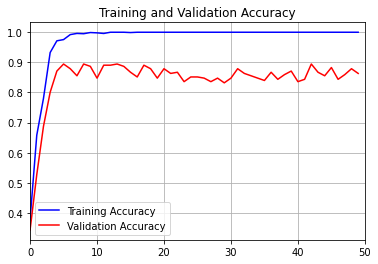

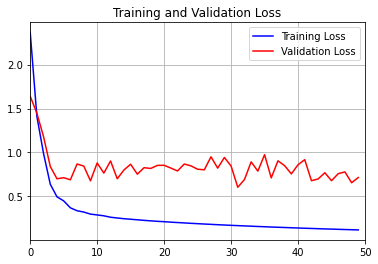

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, label = 'Training Accuracy', color = 'blue')
plt.plot(epochs, val_acc, label = 'Validation Accuracy', color = 'red')
plt.xlim([0,50])
plt.grid('on')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, label = 'Training Loss', color = 'blue')
plt.plot(epochs, val_loss, label = 'Validation Loss',color = 'red')
plt.xlim([0,50])
plt.grid('on')
plt.title('Training and Validation Loss')
plt.legend()

### Augmentation

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1/255,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   rotation_range = 40,
                                   horizontal_flip = True,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   fill_mode = 'nearest')
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size = 128,
                                                    target_size = (300, 300),
                                                    class_mode = 'categorical')

test_datagen = ImageDataGenerator(rescale = 1/255.0)
test_generator = test_datagen.flow_from_directory(test_dir,
                                                  batch_size = 32,
                                                  target_size = (300, 300),
                                                  class_mode = 'categorical')

Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.


In [ ]:
model = tf.keras.Sequential([tf.keras.layers.Conv2D(16, (3, 3), activation = 'relu', input_shape = (300, 300, 3)),
                             tf.keras.layers.MaxPooling2D(2, 2),
                             tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
                             tf.keras.layers.MaxPooling2D(2, 2),
                             tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
                             tf.keras.layers.MaxPooling2D(2, 2),
                             tf.keras.layers.Conv2D(128, (3, 3), activation = 'relu'),
                             tf.keras.layers.MaxPooling2D(2, 2),
                             tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(512, activation = 'relu'),
                             tf.keras.layers.Dense(3, activation = 'softmax')])
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

In [ ]:
history = model.fit(train_generator,
                    steps_per_epoch = 8,
                    validation_data = test_generator,
                    validation_steps = 8,
                    epochs = 50,
                    verbose = 1)

Epoch 1/50
8/8 [==============================] - 23s 3s/step - loss: 1.8935 - accuracy: 0.3350 - val_loss: 1.0974 - val_accuracy: 0.3086
Epoch 2/50
8/8 [==============================] - 22s 3s/step - loss: 1.0889 - accuracy: 0.3821 - val_loss: 1.0883 - val_accuracy: 0.3281
Epoch 3/50
8/8 [==============================] - 22s 3s/step - loss: 1.0707 - accuracy: 0.3945 - val_loss: 1.0361 - val_accuracy: 0.5000
Epoch 4/50
8/8 [==============================] - 21s 3s/step - loss: 1.0358 - accuracy: 0.4654 - val_loss: 1.0350 - val_accuracy: 0.3242
Epoch 5/50
8/8 [==============================] - 23s 3s/step - loss: 0.9959 - accuracy: 0.5020 - val_loss: 0.9069 - val_accuracy: 0.4375
Epoch 6/50
8/8 [==============================] - 22s 3s/step - loss: 0.9334 - accuracy: 0.5213 - val_loss: 0.7415 - val_accuracy: 0.8242
Epoch 7/50
8/8 [==============================] - 21s 3s/step - loss: 0.7734 - accuracy: 0.6697 - val_loss: 0.5191 - val_accuracy: 0.8047
Epoch 8/50
8/8 [==================

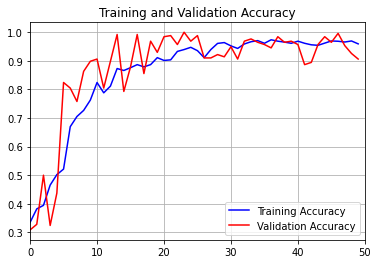

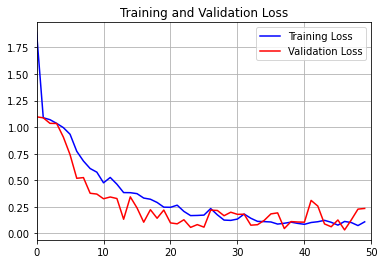

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, label = 'Training Accuracy', color = 'blue')
plt.plot(epochs, val_acc, label = 'Validation Accuracy', color = 'red')
plt.xlim([0,50])
plt.grid('on')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, label = 'Training Loss', color = 'blue')
plt.plot(epochs, val_loss, label = 'Validation Loss',color = 'red')
plt.xlim([0,50])
plt.grid('on')
plt.title('Training and Validation Loss')
plt.legend()

### Dropout

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1/255,
                                   width_shift_range = 0,
                                   height_shift_range = 0,
                                   rotation_range = 0,
                                   horizontal_flip = False,
                                   shear_range = 0,
                                   zoom_range = 0,
                                   fill_mode = 'nearest')
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size = 128,
                                                    target_size = (300, 300),
                                                    class_mode = 'categorical')

test_datagen = ImageDataGenerator(rescale = 1/255.0)
test_generator = test_datagen.flow_from_directory(test_dir,
                                                  batch_size = 32,
                                                  target_size = (300, 300),
                                                  class_mode = 'categorical')

Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.


In [ ]:
model = tf.keras.Sequential([tf.keras.layers.Conv2D(16, (3, 3), activation = 'relu', input_shape = (300, 300, 3)),
                             tf.keras.layers.MaxPooling2D(2, 2),
                             tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
                             tf.keras.layers.MaxPooling2D(2, 2),
                             tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
                             tf.keras.layers.MaxPooling2D(2, 2),
                             tf.keras.layers.Conv2D(128, (3, 3), activation = 'relu'),
                             tf.keras.layers.MaxPooling2D(2, 2),
                             tf.keras.layers.Flatten(),
                             tf.keras.layers.Dropout(0.2),
                             tf.keras.layers.Dense(512, activation = 'relu'),
                             tf.keras.layers.Dropout(0.2),
                             tf.keras.layers.Dense(3, activation = 'softmax')])
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

In [ ]:
history = model.fit(train_generator,
                    steps_per_epoch = 8,
                    validation_data = test_generator,
                    validation_steps = 8,
                    epochs = 50,
                    verbose = 1)

Epoch 1/50
8/8 [==============================] - 6s 716ms/step - loss: 1.9285 - accuracy: 0.3669 - val_loss: 1.0669 - val_accuracy: 0.3164
Epoch 2/50
8/8 [==============================] - 6s 708ms/step - loss: 0.8894 - accuracy: 0.5908 - val_loss: 0.9810 - val_accuracy: 0.4336
Epoch 3/50
8/8 [==============================] - 6s 688ms/step - loss: 0.5355 - accuracy: 0.7846 - val_loss: 0.9097 - val_accuracy: 0.5234
Epoch 4/50
8/8 [==============================] - 6s 708ms/step - loss: 0.2755 - accuracy: 0.8984 - val_loss: 0.4827 - val_accuracy: 0.7812
Epoch 5/50
8/8 [==============================] - 6s 774ms/step - loss: 0.1436 - accuracy: 0.9665 - val_loss: 0.4071 - val_accuracy: 0.8750
Epoch 6/50
8/8 [==============================] - 6s 685ms/step - loss: 0.0751 - accuracy: 0.9776 - val_loss: 0.5849 - val_accuracy: 0.8203
Epoch 7/50
8/8 [==============================] - 5s 677ms/step - loss: 0.0555 - accuracy: 0.9827 - val_loss: 0.4178 - val_accuracy: 0.8594
Epoch 8/50
8/8 [====

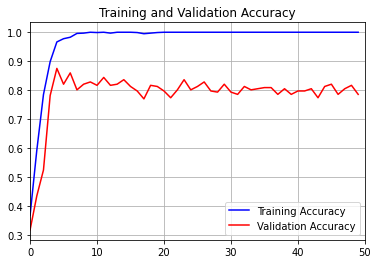

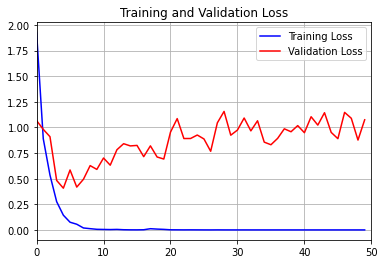

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, label = 'Training Accuracy', color = 'blue')
plt.plot(epochs, val_acc, label = 'Validation Accuracy', color = 'red')
plt.xlim([0,50])
plt.grid('on')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, label = 'Training Loss', color = 'blue')
plt.plot(epochs, val_loss, label = 'Validation Loss',color = 'red')
plt.xlim([0,50])
plt.grid('on')
plt.title('Training and Validation Loss')
plt.legend()

###DropConnect

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1/255,
                                   width_shift_range = 0,
                                   height_shift_range = 0,
                                   rotation_range = 0,
                                   horizontal_flip = False,
                                   shear_range = 0,
                                   zoom_range = 0,
                                   fill_mode = 'nearest')
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size = 128,
                                                    target_size = (300, 300),
                                                    class_mode = 'categorical')

test_datagen = ImageDataGenerator(rescale = 1/255.0)
test_generator = test_datagen.flow_from_directory(test_dir,
                                                  batch_size = 32,
                                                  target_size = (300, 300),
                                                  class_mode = 'categorical')

Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.


In [ ]:
pip install dropconnect-tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for dropconnect-tensorflow: filename=dropconnect_tensorflow-0.1.1-py3-none-any.whl size=4659 sha256=cd912463d0d250ce4472cd89def07079d31a0ad6ef117f4bbd8f85f36a43ecc3
  Stored in directory: /root/.cache/pip/wheels/b3/01/96/2463fe99c7de6dcdd3b28e6ecdafa4081709eb38b1a446d4dd
Successfully built dropconnect-tensorflow


In [ ]:
from dropconnect_tensorflow import DropConnectDense

model = tf.keras.Sequential([tf.keras.layers.Conv2D(16, (3, 3), activation = 'relu', input_shape = (300, 300, 3)),
                             tf.keras.layers.MaxPooling2D(2, 2),
                             tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
                             tf.keras.layers.MaxPooling2D(2, 2),
                             tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
                             tf.keras.layers.MaxPooling2D(2, 2),
                             tf.keras.layers.Conv2D(128, (3, 3), activation = 'relu'),
                             tf.keras.layers.MaxPooling2D(2, 2),
                             tf.keras.layers.Flatten(),
                             
                             tf.keras.layers.Dense(512, activation = 'relu'),
                             DropConnectDense(units=64, prob=0.2, activation="relu", use_bias=True),
                             tf.keras.layers.Dense(3, activation = 'softmax')])
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 149, 149, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 147, 147, 32)      4640      
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 73, 73, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 71, 71, 64)        18496     
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 35, 35, 64)      

In [ ]:
history = model.fit(train_generator,
                    steps_per_epoch = 8,
                    validation_data = test_generator,
                    validation_steps = 8,
                    epochs = 50,
                    verbose = 1)

Epoch 1/50
8/8 [==============================] - 7s 804ms/step - loss: 1.3961 - accuracy: 0.4400 - val_loss: 1.0501 - val_accuracy: 0.5312
Epoch 2/50
8/8 [==============================] - 7s 889ms/step - loss: 0.8162 - accuracy: 0.6777 - val_loss: 0.9007 - val_accuracy: 0.6289
Epoch 3/50
8/8 [==============================] - 6s 689ms/step - loss: 0.3483 - accuracy: 0.8902 - val_loss: 0.4755 - val_accuracy: 0.8203
Epoch 4/50
8/8 [==============================] - 6s 710ms/step - loss: 0.0811 - accuracy: 0.9824 - val_loss: 0.3976 - val_accuracy: 0.8633
Epoch 5/50
8/8 [==============================] - 6s 688ms/step - loss: 0.0277 - accuracy: 0.9898 - val_loss: 0.5791 - val_accuracy: 0.8516
Epoch 6/50
8/8 [==============================] - 6s 775ms/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 0.7988 - val_accuracy: 0.8398
Epoch 7/50
8/8 [==============================] - 6s 694ms/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 0.9170 - val_accuracy: 0.8359
Epoch 8/50
8/8 [====

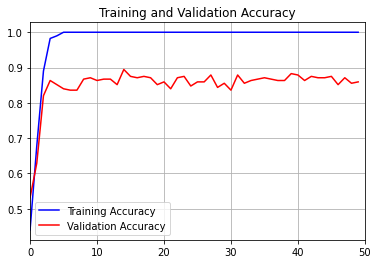

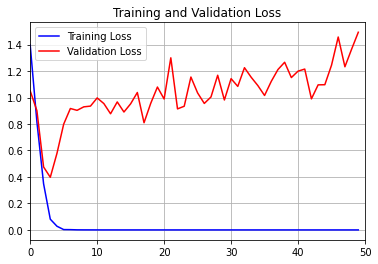

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, label = 'Training Accuracy', color = 'blue')
plt.plot(epochs, val_acc, label = 'Validation Accuracy', color = 'red')
plt.xlim([0,50])
plt.grid('on')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, label = 'Training Loss', color = 'blue')
plt.plot(epochs, val_loss, label = 'Validation Loss',color = 'red')
plt.xlim([0,50])
plt.grid('on')
plt.title('Training and Validation Loss')
plt.legend()